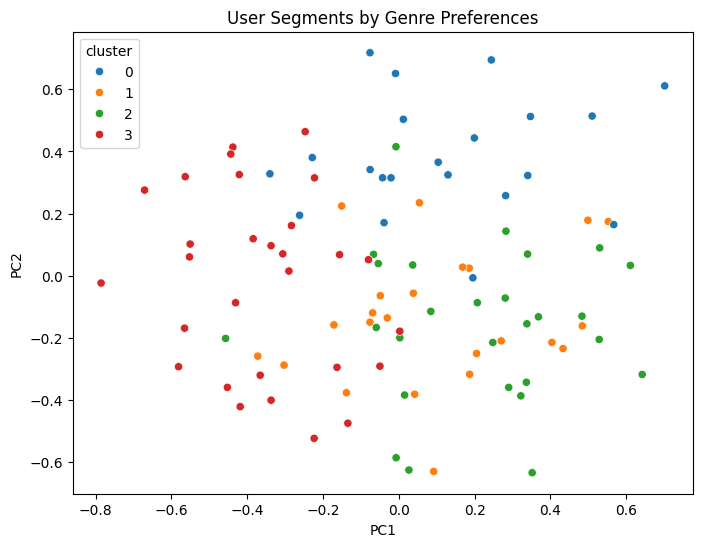

           Action    Comedy     Drama   Romance    Sci-Fi  Thriller
cluster                                                            
0        0.727261  0.437657  0.232654  0.581200  0.606194  0.634954
1        0.375661  0.229716  0.704433  0.522418  0.419693  0.389547
2        0.193545  0.722013  0.371626  0.544870  0.609284  0.415605
3        0.740345  0.776641  0.668174  0.400197  0.305658  0.429721


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate user-genre preferences (fake data for demo)
genres = ['Action', 'Comedy', 'Drama', 'Romance', 'Sci-Fi', 'Thriller']
num_users = 100
np.random.seed(42)

user_preferences = pd.DataFrame(np.random.rand(num_users, len(genres)), columns=genres)
user_preferences["user_id"] = [f"User_{i}" for i in range(num_users)]

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
user_preferences["cluster"] = kmeans.fit_predict(user_preferences[genres])

# PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(user_preferences[genres])
user_preferences["PC1"] = components[:, 0]
user_preferences["PC2"] = components[:, 1]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=user_preferences, x="PC1", y="PC2", hue="cluster", palette="tab10")
plt.title("User Segments by Genre Preferences")
plt.show()

# Cluster analysis
print(user_preferences.groupby("cluster")[genres].mean())
